# Ecuación de difusión en dos dimensiones

Erick Hafid Castro Mora

Se presenta a la ecuación de difusión en dos coordenadas espaciales y una termporal como: 

\begin{equation}
\frac{\partial u}{\partial t}=\nu \frac{\partial^{2} u}{\partial x^{2}}+\nu \frac{\partial^{2} u}{\partial y^{2}}
\end{equation}

La resolución de la misma puede llevarse a cabo mediante la discretización de esta, de manera muy similar a como se ha realizado en ocasiones anteriores, entonces, para las segundas derivadas, se obtiene que la misma ecuación diferencial puede escribirse en términos de pasos discretos como

\begin{equation}
\frac{u_{i, j}^{n+1}-u_{i, j}^{n}}{\Delta t}=\nu \frac{u_{i+1, j}^{n}-2 u_{i, j}^{n}+u_{i-1, j}^{n}}{\Delta x^{2}}+\nu \frac{u_{i, j+1}^{n}-2 u_{i, j}^{n}+u_{i, j-1}^{n}}{\Delta y^{2}}
\end{equation}

Entonces, se puede resolver ara la coordenada desconocida $u^{n+1}_{i, j}$

\begin{equation}
u_{i, j}^{n+1}=u_{i, j}^{n}+\frac{\nu \Delta t}{\Delta x^{2}}\left(u_{i+1, j}^{n}-2 u_{i, j}^{n}+u_{i-1, j}^{n}\right)+\frac{\nu \Delta t}{\Delta y^{2}}\left(u_{i, j+1}^{n}-2 u_{i, j}^{n}+u_{i, j-1}^{n}\right)
\end{equation}

Y programar

## Código

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [0]:
# Se define una función para graficar en tres dimensiones 
def plot3D(x, y, phi):
  fig = plt.figure(figsize = (11, 7), dpi = 100)
  ax = fig.gca(projection = '3d')
  X, Y = np.meshgrid(x, y)
  surf = ax.plot_surface(X, Y, phi, rstride = 1, cstride = 1, cmap = cm.viridis, linewidth = 0, antialiased = False)
  ax.set_xlim(0, max(x))
  ax.set_ylim(0, max(y))
  ax.set_zlim(1, 2.0)
  ax.set_xlabel('$x$')
  ax.set_ylabel('$y$')

In [0]:
# Variables
nx = 31
ny = 31
nt = 17
nu = 0.05
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = 0.25
dt = sigma * dx * dy / nu

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))
un = np.ones((ny, nx))

In [0]:
# Condiciones iniciales
u[int(0.5 / dy):int(1 / dy + 1),int(0.5 / dx):int(1 / dx + 1)] = 2  

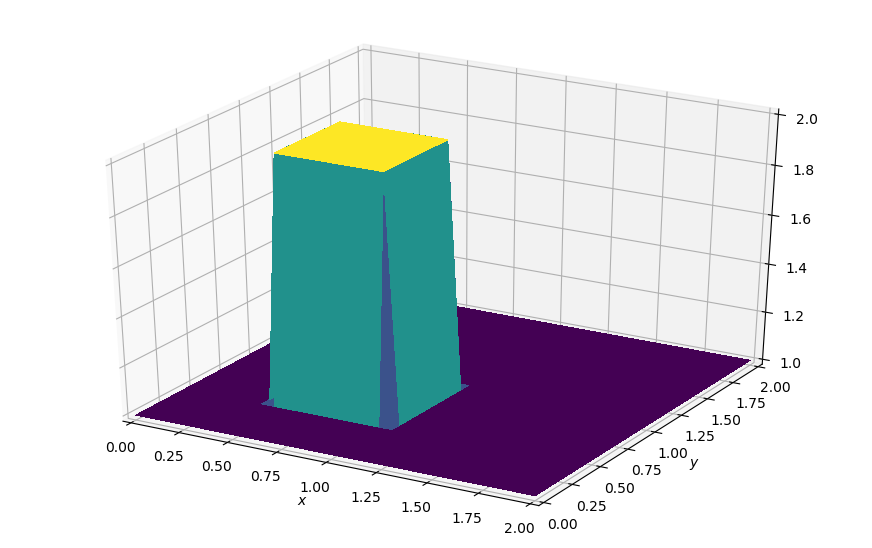

In [0]:
plot3D(x, y, u)

In [0]:
def difusion(nt):
    u[int(0.5 / dy):int(1 / dy + 1),int(0.5 / dx):int(1 / dx + 1)] = 2  
    
    for n in range(nt + 1): 
        un = u.copy()
        u[1:-1, 1:-1] = (un[1:-1,1:-1] + 
                        nu * dt / dx**2 * 
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                        nu * dt / dy**2 * 
                        (un[2:,1: -1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1
        
    plot3D(x, y, u)

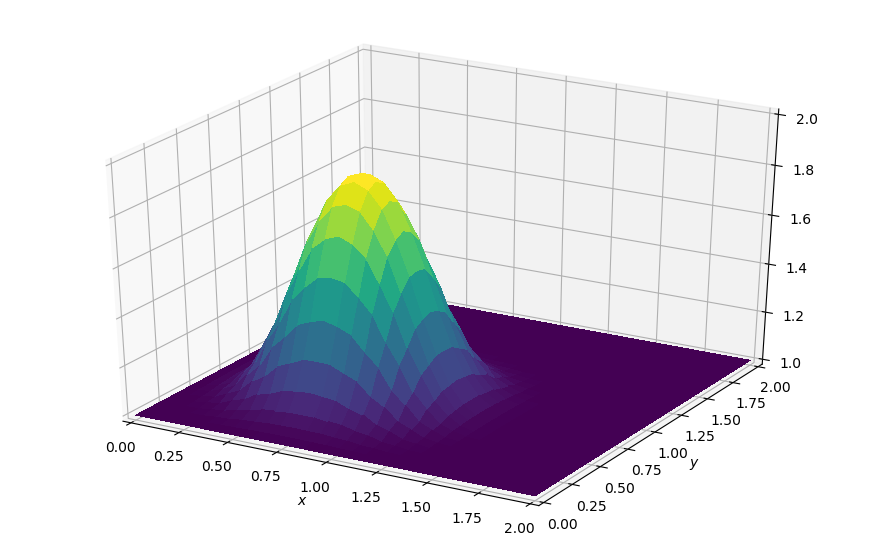

In [0]:
difusion(10)

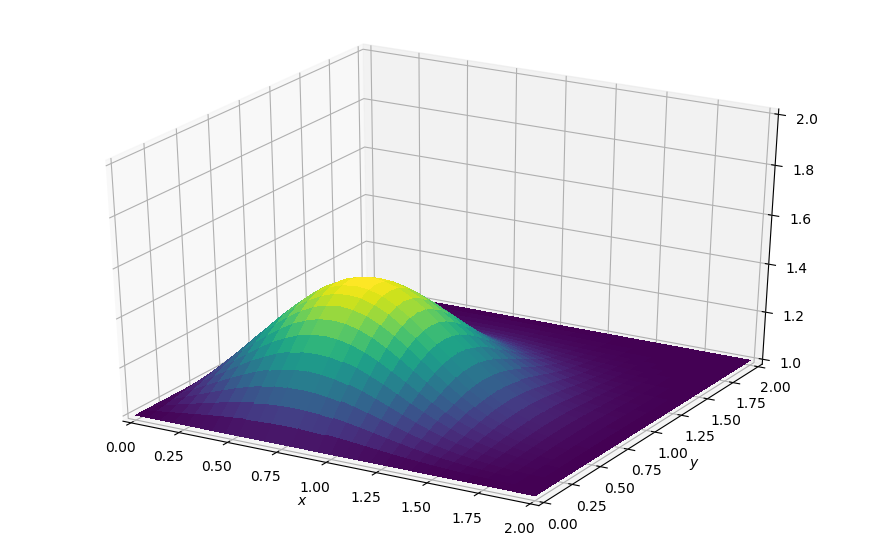

In [0]:
difusion(50)